This code is a result of a recent research on portfolio theory. One can see the paper

 ***Halidias, Nikolaos. "A novel portfolio optimization method and its application to the hedging problem" Monte Carlo Methods and Applications, vol. 30, no. 3, 2024, pp. 249-267,*** and the references therein. (https://www.degruyterbrill.com/document/doi/10.1515/mcma-2024-2009/html)

See also the book
***Halidias, Nikolaos and Stamatiou, Ioannis S.. Stochastic Analysis: Financial Mathematics with Matlab®, De Gruyter, 2026.*** (https://www.degruyterbrill.com/document/isbn/9783111443737/html?lang=en&srsltid=AfmBOorukbLCPRdRPn2Mu2kqSWiGttsEAPF6wBfVNixx4fAFzxycr6Fl)

At the webpage of the ***Actuarial-Financial Laboratory*** https://www.samos.aegean.gr/actuar/nick/actfinlabeng.htm one can find also other useful informations.



We use all the call and put options from the yahoo finace in order to construct the portfolio. If you choose experiment=1 then we use the lastPrices otherwise the bid-ask prices. If for any reason you want to take account only some of the call and put options you should manually set the data stock_value, call_strikes,put_strikes,call_ask,call_bid,put_ask,put_bid.


Before using this code you should have in your mind a prediction about the future price. This prediction can be some prices with some weights, like $KKmax=[280,0.8]$.
At first, you should specify the amount to be invested, the maximum possible loss for your portfolio, the firm, the expiration date of the options, the maximum number of options of each strike and the maximum number of options of all types.

In practice, before the expiration you should have:

1.   The amount 100*strike price for each call you have bought
2.   100 shares for each call that you have sell
3.   100 shares for each put that you have bought
4.   The amount 100*strike price for each put that you have sell



If you want to download data from Yahoo finance you should set Data_given=1. Otherwise you should have an excel file from which the data will be stored.

In [2]:
import numpy as np
import yfinance as yf

#Data_given = 1  # Set 1 to download from Yahoo Finance, else read from Excel
#experiment = 0  # Set experiment 0  for bid/ask handling and 1 for lastprices

while True:
    Data_given = input("\nΕπιλέξτε 1 για δεδομένα από Yahoo Finance και 0 από Excel: ").strip()

    try:
        Data_given = int(Data_given)  # Προσπαθούμε να το μετατρέψουμε σε αριθμό
        if Data_given in [0, 1]:
            break
        else:
            print("Παρακαλώ εισάγετε μόνο 0 ή 1.")
    except ValueError:
        print("Μη έγκυρη είσοδη. Εισάγετε μόνο 0 ή 1.")

while True:
    experiment = input("\nΕπιλέξτε 0 για να χρησιμοποιηθούν οι τιμές bid/ask και 1 για lastprices: ").strip()

    try:
        Data_given = int(Data_given)  # Προσπαθούμε να το μετατρέψουμε σε αριθμό
        if Data_given in [0, 1]:
            break
        else:
            print("Παρακαλώ εισάγετε μόνο 0 ή 1.")
    except ValueError:
        print("Μη έγκυρη είσοδη. Εισάγετε μόνο 0 ή 1.")






if Data_given == 1:
    # Ζητάμε από τον χρήστη να εισάγει το ticker
    Firm = input("Εισάγετε το ticker symbol (π.χ. AAPL): ").strip().upper()

    # Φορτώνουμε το asset
    stock = yf.Ticker(Firm)

    # Παίρνουμε τις διαθέσιμες expiration dates
    expirations = stock.options

    if not expirations:
        print(f"Δεν βρέθηκαν expiration dates για {Firm}")
    else:
        print("\nΔιαθέσιμες Expiration Dates:")
        for i, date in enumerate(expirations):
            print(f"{i+1}. {date}")

        # Επιλογή expiration date με valid checks
        while True:
            choice_str = input("\nΕπιλέξτε αριθμό expiration date: ").strip()
            try:
                choice = int(choice_str) - 1
                if 0 <= choice < len(expirations):
                    ExpirationDate = expirations[choice]
                    print(f"\nΦορτώνω δεδομένα για {Firm} με expiration date {ExpirationDate}...")
                    break
                else:
                    print("Μη έγκυρη επιλογή. Παρακαλώ εισάγετε έναν αριθμό από τη λίστα.")
            except ValueError:
                print("Μη έγκυρη εισαγωγή. Παρακαλώ εισάγετε έναν αριθμό.")
else:
    excel_file = input("Εισάγετε το Excel file (π.χ. options_data.xlsx): ").strip()


#######################################################################################################################
# Function that downloads data from Yahoo Finance
def options_bid_ask(firm, expiration_date, experiment_mode):
    import yfinance as yt
     #stock = yt.Ticker(firm)
    stock_value = stock.history(period='1d')['Close'].iloc[-1]

    options_chain = stock.option_chain(expiration_date)
    call_strikes = options_chain.calls['strike'].to_numpy()
    put_strikes = options_chain.puts['strike'].to_numpy()

    if experiment_mode == 1:
        call_ask = options_chain.calls['lastPrice'].to_numpy()
        call_bid = options_chain.calls['lastPrice'].to_numpy()
        put_ask = options_chain.puts['lastPrice'].to_numpy()
        put_bid = options_chain.puts['lastPrice'].to_numpy()
    else:
        call_ask = options_chain.calls['ask'].to_numpy()
        call_bid = options_chain.calls['bid'].to_numpy()
        put_ask = options_chain.puts['ask'].to_numpy()
        put_bid = options_chain.puts['bid'].to_numpy()

    return stock_value, call_strikes, put_strikes, call_ask, call_bid, put_ask, put_bid
######################################################################################################################


##################################################################################################
# Function that reads data from Excel
def options_bid_ask_excel(experiment_mode):
    import pandas as pd
    try:
        df = pd.read_excel(excel_file)
        stock_value = df.iloc[0, 0]

        call_strikes = df.iloc[:, 1].dropna().to_numpy()
        put_strikes = df.iloc[:, 5].dropna().to_numpy()

        if experiment_mode == 1:
            call_ask = df.iloc[:, 2].dropna().to_numpy()
            call_bid = df.iloc[:, 2].dropna().to_numpy()
            put_ask = df.iloc[:, 6].dropna().to_numpy()
            put_bid = df.iloc[:, 6].dropna().to_numpy()
        else:
            call_ask = df.iloc[:, 4].dropna().to_numpy()
            call_bid = df.iloc[:, 3].dropna().to_numpy()
            put_ask = df.iloc[:, 8].dropna().to_numpy()
            put_bid = df.iloc[:, 7].dropna().to_numpy()

        return stock_value, call_strikes, put_strikes, call_ask, call_bid, put_ask, put_bid
    except FileNotFoundError:
        print(f"Error: '{excel_file}' not found. Please make sure the file exists.")
        return None, None, None, None, None, None, None
########################################################################################################################


##########################################################################################
# Collect data based on user's selection
if Data_given == 1:
    stock_value, call_strikes, put_strikes, call_ask1, call_bid, put_ask1, put_bid = options_bid_ask(Firm, ExpirationDate, experiment)
else:
    stock_value, call_strikes, put_strikes, call_ask1, call_bid, put_ask1, put_bid = options_bid_ask_excel(experiment)
##########################################################################################


# Τυπώνουμε αποτελέσματα για έλεγχο
if stock_value is not None:
    print("\nStock Value:", stock_value)
    print("Call Strikes:", call_strikes)
    print("Put Strikes:", put_strikes)
    print("Call Ask:", call_ask1)
    print("Call Bid:", call_bid)
    print("Put Ask:", put_ask1)
    print("Put Bid:", put_bid)
else:
    print("Αποτυχία εισαγωγής δεδομένων.")

#######################################################################################
# We will remove zeros from the ask prices
keep_mask_call = call_ask1 != 0
keep_mask_put = put_ask1 !=0
call_ask = call_ask1[keep_mask_call]
call_bid = call_bid[keep_mask_call]
put_ask = put_ask1[keep_mask_put]
put_bid = put_bid[keep_mask_put]
call_strikes=call_strikes[keep_mask_call]
put_strikes=put_strikes[keep_mask_put]
########################################################################################


# Ερώτηση προς τον χρήστη για διαταραχή δεδομένων
while True:
    choice = input("\nΘέλετε να χρησιμοποιήσετε τα δεδομένα όπως είναι ή να γίνει μικρή διαταραχή;\n"
                   "1. Χωρίς διαταραχή\n"
                   "2. Με διαταραχή (ask + x%, bid - x%)\n"
                   "Επιλογή (1 ή 2): ").strip()

    if choice in ['1', '2']:
        break
    else:
        print("Παρακαλώ εισάγετε 1 ή 2.")

if choice == '2':
    while True:
        try:
            percent = float(input("Εισάγετε το ποσοστό (%) διαταραχής (π.χ. 5 για ±5%): "))
            if percent >= 0:
                break
            else:
                print("Παρακαλώ εισάγετε θετικό αριθμό.")
        except ValueError:
            print("Μη έγκυρη εισαγωγή. Παρακαλώ εισάγετε έναν αριθμό.")

    # Διαταραχή των τιμών
    call_ask = np.round(call_ask * (1 + percent / 100), 2)
    call_bid = np.round(call_bid * (1 - percent / 100), 2)
    put_ask = np.round(put_ask * (1 + percent / 100), 2)
    put_bid = np.round(put_bid * (1 - percent / 100), 2)

    print(f"\nΟι τιμές έχουν διαταραχθεί κατά ±{percent}%:")
    print("Διορθωμένες Call Ask:", call_ask)
    print("Διορθωμένες Call Bid:", call_bid)
    print("Διορθωμένες Put Ask:", put_ask)
    print("Διορθωμένες Put Bid:", put_bid)
else:
    print("\nΧρησιμοποιούνται τα αρχικά δεδομένα χωρίς διαταραχή.")


Επιλέξτε 1 για δεδομένα από Yahoo Finance και 0 από Excel: 1

Επιλέξτε 0 για να χρησιμοποιηθούν οι τιμές bid/ask και 1 για lastprices: 0
Εισάγετε το ticker symbol (π.χ. AAPL): HTZ

Διαθέσιμες Expiration Dates:
1. 2025-06-20
2. 2025-06-27
3. 2025-07-03
4. 2025-07-11
5. 2025-07-18
6. 2025-07-25
7. 2025-09-19
8. 2025-10-17
9. 2025-12-19
10. 2026-01-16
11. 2026-06-18
12. 2026-12-18
13. 2027-01-15

Επιλέξτε αριθμό expiration date: 12

Φορτώνω δεδομένα για HTZ με expiration date 2026-12-18...

Stock Value: 5.869999885559082
Call Strikes: [ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  7.5 10.  12.5
 15.  17. ]
Put Strikes: [ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  7.5 10.  12.5]
Call Ask: [7.9  7.2  7.5  0.   3.9  3.4  3.2  2.9  2.9  2.5  2.3  1.7  1.25 0.95
 0.75 1.15]
Call Bid: [4.6  4.1  4.7  0.   2.9  1.4  2.9  2.65 2.65 2.2  2.   1.3  1.   0.7
 0.5  0.65]
Put Ask: [0.25 0.   0.45 0.65 1.35 1.1  1.35 1.6  1.9  2.2  3.2  4.   6.   0.  ]
Put Bid: [0.   0.   0.4  0.

[ 6.5  6.   5.5  5.   4.   3.5  3.   2.5  2.   1.5  1.   0.   0.   0.
  0.   0.  -6.  -5.5 -5.  -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.  -0.
 -0.  -0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  3.5 -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -1.  -3.5 -1.
  0.   0. ]
[ 7.   6.5  6.   5.5  4.5  4.   3.5  3.   2.5  2.   1.5  0.   0.   0.
  0.   0.  -6.5 -6.  -5.5 -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -0.  -0.
 -0.  -0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5
  3.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.5 -3.   0.
 -1.   0. ]
[ 9.   8.5  8.   7.5  6.5  6.   5.5  5.   4.5  4.   3.5  1.5  0.   0.
  0.   0.  -8.5 -8.  -7.5 -6.5 -6.  -5.5 -5.  -4.5 -4.  -3.5 -1.5 -0.
 -0.  -0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -1.   0.
  0.  -1. ]
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
 

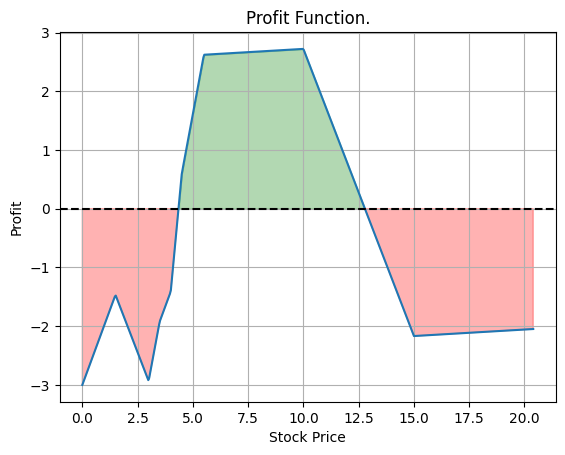

In [7]:



#####################################################################################################################
# You should set the following data
D =3 # Maximum possible loss. If D<0 then that means arbitrage
V = 10  # Amount to be invested. If the amount is big and below you choose small number of options and shares then the problem may be infeasible
KKmax=np.array([[6.5,0.5],[7,0.5],[9,0.5]]) # We want our portfolio to have profit near these  points with some weights. This is our prediction.
max_number_of_total_call_options_to_buy=40 # Maximum number of total call options  to buy
max_number_of_total_put_options_to_buy=40 # Maximum number of total put options to buy
max_number_of_total_call_options_to_sell=40 # Maximum number of total call options to sell
max_number_of_total_put_options_to_sell=40 # Maximum number of total put options to sell
max_number_of_call_options_to_buy=3  # the number of maximum number of call options of each strike to buy
max_number_of_put_options_to_buy=3 # the number of maximum number of put options of each strike to buy
max_number_of_call_options_to_sell=3 # the number of maximum number of call options of each strike to sell
max_number_of_put_options_to_sell=3 # the number of maximum number of put options of each strike to sell
max_number_of_shares_to_buy=100
max_number_of_shares_to_sell=100
#######################################################################################################################







############################################
number_of_Kmaxes = KKmax.shape[0]
###########################################


#########################################################################################
# These data  are for experiments
#stock_value=8
#call_strikes=np.array([7,8])
#put_strikes=np.array([7,8,9])
#call_ask1=np.array([0,3])
#call_bid=np.array([3.9,2.9])
#put_ask1=np.array([3,4,5])
#put_bid=np.array([2.9,3.9,4.9])
########################################################################################



###########################################################################################
union_strikes=np.union1d(call_strikes,put_strikes) #The union of call_strikes and put_strikes
max_element = union_strikes.max() # We need this for the plot
##########################################################################################


###########################################################################################
# This will give the row of the matrix A for each strike price.
# The first element is the number of shares, next call options to buy,
# call options to sell, put options to buy, put options to sell and the Kmaxes
def P(x):
    matrixrow = np.maximum(x - call_strikes, 0)
    matrixrow = np.append(matrixrow, -np.maximum(x-call_strikes, 0))
    matrixrow=np.append(matrixrow, np.maximum(put_strikes-x, 0))
    matrixrow=np.append(matrixrow, -np.maximum(put_strikes-x, 0))
    matrixrow = np.append(x, matrixrow)
    return matrixrow
# We will add some more elements depending on KKmax
def PP(x):
    (number_of_Kmaxes,weights)=np.shape(KKmax)
    matrixrow=P(x)
    for i in range(1,number_of_Kmaxes+1):
        matrixrow=np.append(matrixrow,0)
    return matrixrow
#####################################################################################################


###########################################################################################
# We begin to set the matrix AA
AA = PP(0)
number_of_columns_AA = AA.shape[0]
for x in union_strikes:
    AA=np.vstack([AA, PP(x)])
AA = -AA
############################################################################################


##########################################################################################
# Adding the row with the derivative
Aderiv = np.zeros(number_of_columns_AA)
for i in range(0,len(call_strikes)+1):
    Aderiv[i] = -1
for i in range(len(call_strikes)+1, 2*len(call_strikes)+1):
    Aderiv[i] = 1
AA = np.vstack([AA, Aderiv])
############################################################################################


###########################################################################################
#  Adding the rows for the Kmaxes. P(KKmax) \geq D_i
for i in range(0,number_of_Kmaxes):
    AAKmax=PP(KKmax[i,0])
    AAKmax[2*len(call_strikes)+2*len(put_strikes)+1+i]=-1
    AA=np.vstack([AA, -AAKmax])
############################################################################################




###########################################################################################
# Adding the row with options prices
Aequality=call_ask
Aequality=np.append(Aequality,-call_bid)
Aequality=np.append(Aequality,put_ask)
Aequality=np.append(Aequality,-put_bid)
Aequality=np.append(stock_value,Aequality)
Kmaxeszeros=np.zeros(number_of_Kmaxes)
Aequality=np.append(Aequality,Kmaxeszeros)
AA=np.vstack([AA,Aequality])
#############################################################################################





############################################################################################
# Adding the rows for the maximum number of options
Amaxnumberoptions_call_buy=np.full(number_of_columns_AA,0)
Amxanumberoptions_call_sell=np.full(number_of_columns_AA,0)
Amaxnumberoptions_put_buy=np.full(number_of_columns_AA,0)
Amaxnumberoptions_put_sell=np.full(number_of_columns_AA,0)
for i in range(1,len(call_strikes)+1):
    Amaxnumberoptions_call_buy[i]=1
for i in range(len(call_strikes)+1,2*len(call_strikes)+1):
    Amxanumberoptions_call_sell[i]=1
for i in range(2*len(call_strikes)+1,2*len(call_strikes)+len(put_strikes)+1):
    Amaxnumberoptions_put_buy[i]=1
for i in range(2*len(call_strikes)+len(put_strikes)+1,2*len(call_strikes)+2*len(put_strikes)+1):
    Amaxnumberoptions_put_sell[i]=1
AA=np.vstack([AA,Amaxnumberoptions_call_buy])
AA=np.vstack([AA,Amxanumberoptions_call_sell])
AA=np.vstack([AA,Amaxnumberoptions_put_buy])
AA=np.vstack([AA,Amaxnumberoptions_put_sell])
###############################################################################################


######################################################################################
# Setting the right hand side
b = np.zeros(AA.shape[0])
for i in range(0,len(union_strikes)+1):
    b[i] = D - V # Assign D-V to the first len(strikes)+1 elements
b[-4]=max_number_of_total_call_options_to_buy
b[-3]=max_number_of_total_call_options_to_sell
b[-2]=max_number_of_total_put_options_to_buy
b[-1]=max_number_of_total_put_options_to_sell
b[len(union_strikes)+1]=0 # for the row with the derivatives
b[len(union_strikes)+2:len(union_strikes)+2+number_of_Kmaxes]=-V # for the rows of the Kmaxes
b[-5]=V # for the total amount used
#########################################################################################



####################################################################
# Setting the left hand side
bl=np.full_like(b, -np.inf, dtype=float)
bl[-5]=V
###################################################################

#######################################################################
# Setting the upper bounds for the parameters
ub=np.full(AA.shape[1], 0, dtype=float)
ub[-number_of_Kmaxes:]=np.inf
ub[0]=max_number_of_shares_to_buy
for i in range(1,len(call_strikes)+1):
        ub[i]=max_number_of_call_options_to_buy
for i in range(2*len(call_strikes)+1,2*len(call_strikes)+len(put_strikes)+1):
        ub[i]=max_number_of_put_options_to_buy
for i in range(len(call_strikes)+1,2*len(call_strikes)+1):
        ub[i]=max_number_of_call_options_to_sell
for i in range(2*len(call_strikes)+len(put_strikes)+1,2*len(call_strikes)+2*len(put_strikes)+1):
        ub[i]=max_number_of_put_options_to_sell
########################################################################



########################################################
# Setting the lower bounds for the parameters
lb=np.full(AA.shape[1], 0, dtype=float)
lb[0]=-max_number_of_shares_to_sell
#########################################################

###################################################################
# We define the constraints and the bounds
from scipy.optimize import LinearConstraint
constraints=LinearConstraint(AA,bl,b)
from scipy.optimize import Bounds
bounds=Bounds(lb,ub)
###################################################################


######################################################################
# We assume that we can buy  only integer number of options
integrality=np.full(AA.shape[1],1)
integrality[0]=0 # 1 for integer number of shares, 0 for fractional number of shares
integrality[-number_of_Kmaxes:]=0
#############################################################################


#########################################################################
# We set the quantity to be minimized
f=np.zeros(AA.shape[1])
f[-number_of_Kmaxes:]=-KKmax[:,1]
########################################################################


#########################################################################
# We solve the optimization problem
from scipy.optimize import milp
result = milp(c=f, constraints=constraints, integrality=integrality, bounds=bounds)
print(result)
x = result.x
###########################################################################



#################################################################################
# We construct the table of results
from prettytable import PrettyTable
t = PrettyTable(['Shares', 'Number of Shares', 'Price', 'Amount for Shares'])
t.add_row([Firm, x[0], stock_value, x[0]*stock_value])
print(t)
tt=PrettyTable(['Type of Option', 'Strike Price', 'Number of Options', 'Price of each Option'   ])
for i in range(1,len(call_strikes)+1):
    if x[i] > 0.01:
       tt.add_row(['Call', call_strikes[i-1], round(x[i]), call_ask[i-1] ])
for i in range(len(call_strikes)+1,2*len(call_strikes)+1):
    if x[i] > 0.01:
       tt.add_row(['Call', call_strikes[i-len(call_strikes)-1], -round(x[i]), call_bid[i-len(call_strikes)-1] ])
for i in range(2*len(call_strikes)+1, 2*len(call_strikes)+1+len(put_strikes)):
    if x[i] > 0.01:
       tt.add_row(['Put', put_strikes[i-2*len(call_strikes)-1], round(x[i]), put_ask[i-2*len(call_strikes)-1]])
for i in range(2*len(call_strikes)+1+len(put_strikes), 2*len(call_strikes)+2*len(put_strikes)+1):
    if x[i] > 0.01:
       tt.add_row(['Put', put_strikes[i-2*len(call_strikes)-1-len(put_strikes)-1], -round(x[i]), put_bid[i-2*len(call_strikes)-1-len(put_strikes)-1]])
tt.add_divider()
tt.add_row(['Total amount','--', '--',np.dot(AA[-5,:],x),])
tt._align['Number of Options'] = 'r'
print(tt)
#######################################################################################################





################################################################################################
# We define the profit function
def profit_function(y):
    value = x[0]*y
    for i in range(1,2*len(call_strikes)+2*len(put_strikes)+1):
        if x[i] > 0.01:
           value+=x[i]*PP(y)[i]
    value=value-V
    return value # Return the calculated value
################################################################################################


print('Having a prediction about the future price of the asset we may construct a portfolio with profit at these predictions')
###################################################################################
# We plot the profit function
import matplotlib.pyplot as plt
# Generate y values for the plot
ymax=max_element*1.2
y_values = np.linspace(0, ymax, 500)  # Adjust range as needed
# Calculate profit for each y value
profit_values = [profit_function(y) for y in y_values]
# Plot the profit function
# Get the current axes
ax = plt.gca()
# Plot the profit function
ax.plot(y_values, profit_values)
ax.set_xlabel("Stock Price") # Use ax.set_xlabel instead of plt.xlabel
ax.set_ylabel("Profit") # Use ax.set_ylabel instead of plt.ylabel
ax.set_title(f"Profit Function.") # Use ax.set_title instead of plt.title
ax.grid(True)
ax.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax.fill_between(y_values, profit_values, 0, where=np.array(profit_values) > 0, color='green', alpha=0.3, label='Περιοχή y > 0')
ax.fill_between(y_values, profit_values, 0, where=np.array(profit_values) < 0, color='red', alpha=0.3, label='Περιοχή y < 0')
##############################################################################################################################